<a href="https://colab.research.google.com/github/Emyfoton/Codigos_pregrado/blob/main/Microondas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

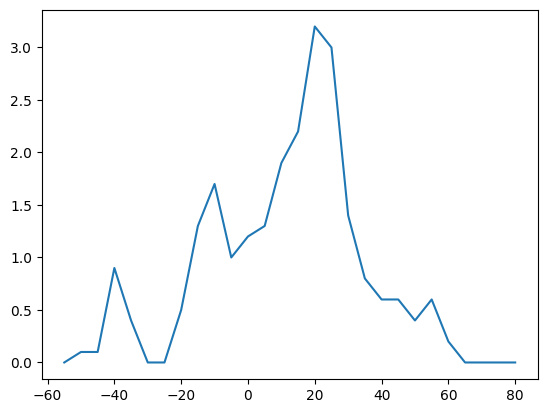

In [ ]:
theta= np.array([-55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
mA= np.array([0, 0.1, 0.1, 0.9, 0.4, 0, 0, 0.5, 1.3, 1.7, 1, 1.2, 1.3, 1.9, 2.2, 3.2, 3, 1.4, 0.8, 0.6, 0.6, 0.4, 0.6, 0.2, 0, 0, 0, 0 ])
d= 2.35 #cm
a= 3.15 #cm

plt.plot(theta, mA)
plt.show()


In [ ]:
def otro_intento(x, I0):
    return I0*(np.cos(np.pi*d*np.sin(theta)/(lamb))**2)*((np.sin(np.pi*a*np.sin(theta)/lamb))/(np.pi*a*np.sin(theta)/lamb))**2

In [ ]:
import numpy as np
from lmfit import Model

def otro_intento(x, I0):
    denominator = np.pi * a * np.sin(x) / lamb
    sinc_term = np.where(np.abs(denominator) < 1e-10, 1.0, np.sin(denominator) / denominator)
    return I0 * (np.cos(np.pi * d * np.sin(x) / lamb)**2) * (sinc_term)**2

model2 = Model(otro_intento)
resultR2 = model2.fit(mA, x=theta, I0=1)
print(resultR2.fit_report())

[[Model]]
    Model(otro_intento)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 28
    # variables        = 1
    chi-square         = 35.6926404
    reduced chi-square = 1.32194965
    Akaike info crit   = 8.79672020
    Bayesian info crit = 10.1289247
    R-squared          = -0.62503078
[[Variables]]
    I0:  1.40987727 +/- 0.67151058 (47.63%) (init = 1)


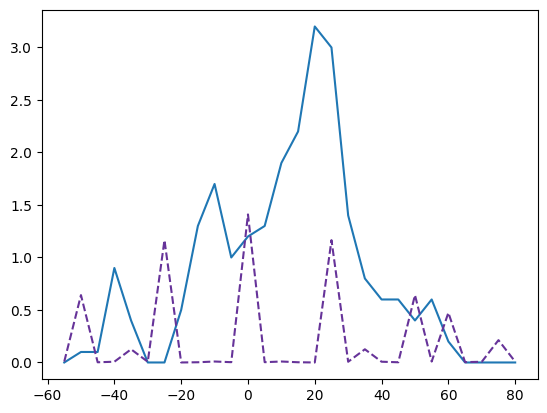

In [ ]:
plt.plot(theta, mA)
plt.plot(theta, resultR2.best_fit,  "--", c="rebeccapurple")
plt.show()

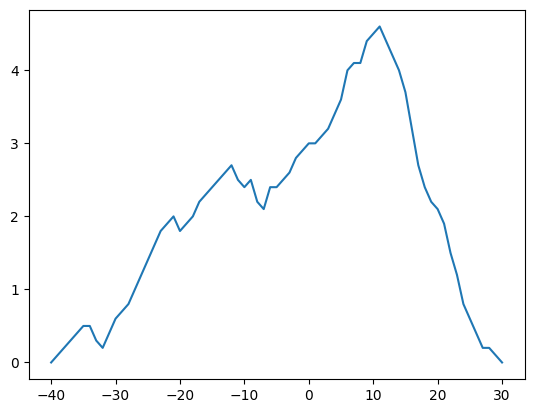

In [ ]:
# Rendija Sensilla

mA_S = np.arange(-40,31,1)
theta_S = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.3, 0.2, 0.4, 0.6, 0.7, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 1.9, 2, 1.8, 1.9, 2, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.5, 2.4, 2.5, 2.2, 2.1, 2.4, 2.4, 2.5, 2.6, 2.8, 2.9, 3, 3, 3.1, 3.2, 3.4, 3.6, 4, 4.1, 4.1, 4.4, 4.5, 4.6, 4.4, 4.2, 4, 3.7, 3.2, 2.7, 2.4, 2.2, 2.1, 1.9, 1.5, 1.2, 0.8, 0.6, 0.4, 0.2, 0.2, 0.1, 0])

plt.plot(mA_S, theta_S)
plt.show()

In [ ]:
xs = np.pi*a*np.sin(theta_S)

def sencilla(x, i_0):
    return i_0*((np.sin(x/lamb))/(x/lamb))**2

popv, pocv= curve_fit(sencilla, xs, mA_S)

<ipython-input-14-7104b17d84ca>:4: RuntimeWarning: invalid value encountered in divide
  return i_0*((np.sin(x/lamb))/(x/lamb))**2
<ipython-input-14-7104b17d84ca>:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popv, pocv= curve_fit(sencilla, xs, mA_S)


<ipython-input-14-7104b17d84ca>:4: RuntimeWarning: invalid value encountered in divide
  return i_0*((np.sin(x/lamb))/(x/lamb))**2


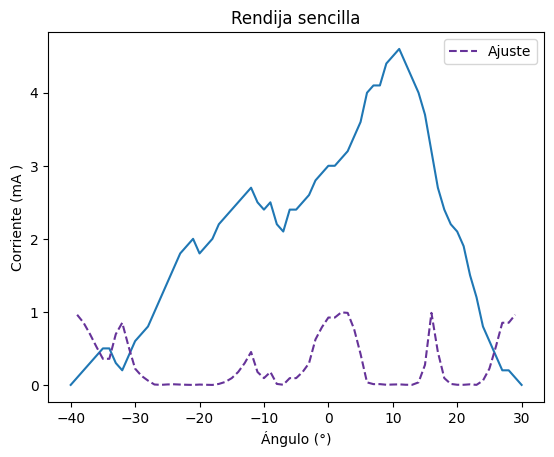

In [ ]:
plt.plot(mA_S, theta_S)
plt.plot(mA_S, sencilla(xs, *popv),  "--", c="rebeccapurple", label =  'Ajuste')
plt.title('Rendija sencilla')
plt.xlabel('Ángulo (°)')
plt.ylabel('Corriente (mA )')
plt.legend()
plt.show()